# Question 1: Bifurcation and Chaos in the Logistic Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Part a) Fixed Points**

In [2]:
def find_fixed_points(r):
    # Solve the quadratic equation x = r*x*(1 - x)
    # Rearranging: r*x - r*x^2 - x = 0 --> -r*x^2 + (r - 1)*x = 0
    
    a = -r
    b = r - 1
    c = 0
    
    # Solve using the quadratic formula: x = (-b ± sqrt(b^2 - 4ac)) / 2a
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return "No real fixed points"
    
    x1 = (-b + np.sqrt(discriminant)) / (2 * a)
    x2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    return x1, x2

# Example usage with a given r
r_value = 3.5  # Change this as needed
fixed_points = find_fixed_points(r_value)
print(f"Fixed points for r = {r_value}: {fixed_points}")

Fixed points for r = 3.5: (-0.0, 0.7142857142857143)


In [3]:
def stability_analysis(r):
    fixed_points = find_fixed_points(r)
    if isinstance(fixed_points, str):
        return fixed_points
    
    x1, x2 = fixed_points
    
    f_prime_x1 = r * (1 - 2 * x1)
    f_prime_x2 = r * (1 - 2 * x2)
    
    stability_x1 = "Stable" if abs(f_prime_x1) < 1 else "Unstable"
    stability_x2 = "Stable" if abs(f_prime_x2) < 1 else "Unstable"
    
    return {"x1": (x1, stability_x1), "x2": (x2, stability_x2)}

r_values = [1, 2, 3, 4]
for r in r_values:
    result = stability_analysis(r)
    print(f"r = {r}: {result}")

r = 1: {'x1': (-0.0, 'Unstable'), 'x2': (-0.0, 'Unstable')}
r = 2: {'x1': (-0.0, 'Unstable'), 'x2': (0.5, 'Stable')}
r = 3: {'x1': (-0.0, 'Unstable'), 'x2': (0.6666666666666666, 'Stable')}
r = 4: {'x1': (-0.0, 'Unstable'), 'x2': (0.75, 'Unstable')}


**Part b) Dynamic Programming**

In [4]:
def logistic_map(r, x0=0.2, threshold=1e-7, max_iter=800):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        x_new = r * x * (1 - x)
        if abs(x_new - x) < threshold:
            break
        x = x_new
        trajectory.append(x)
    return trajectory

r_values = [1, 2, 3, 3.5, 3.8, 4.0]
for r in r_values:
    result = stability_analysis(r)
    print(f"r = {r}: {result}")
    trajectory = logistic_map(r)
    print(f"Logistic map trajectory for r = {r}: {trajectory[-10:]}")

r = 1: {'x1': (-0.0, 'Unstable'), 'x2': (-0.0, 'Unstable')}
Logistic map trajectory for r = 1: [0.0012481382364994784, 0.0012465803874420664, 0.0012450264247797112, 0.0012434763339813114, 0.0012419301005881398, 0.001240387710213393, 0.0012388491485417446, 0.001237314401328902, 0.001235783454401166, 0.0012342562936549944]
r = 2: {'x1': (-0.0, 'Unstable'), 'x2': (0.5, 'Stable')}
Logistic map trajectory for r = 2: [0.2, 0.32000000000000006, 0.43520000000000003, 0.49160192, 0.4998589445046272, 0.49999996020669446]
r = 3: {'x1': (-0.0, 'Unstable'), 'x2': (0.6666666666666666, 'Stable')}
Logistic map trajectory for r = 3: [0.6582382995375511, 0.6748819216783928, 0.6582489404102175, 0.6748718185771302, 0.6582595412025818, 0.6748617528550449, 0.6582701021653836, 0.6748517242816771, 0.6582806235471731, 0.6748417326285543]
r = 3.5: {'x1': (-0.0, 'Unstable'), 'x2': (0.7142857142857143, 'Unstable')}
Logistic map trajectory for r = 3.5: [0.38281968301732416, 0.8269407065914387, 0.5008842103072179, 0

**Part c) Different Initial Condition**

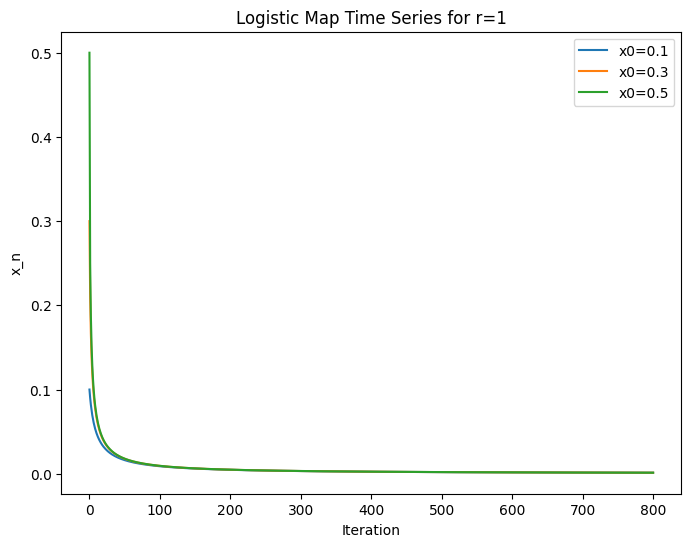

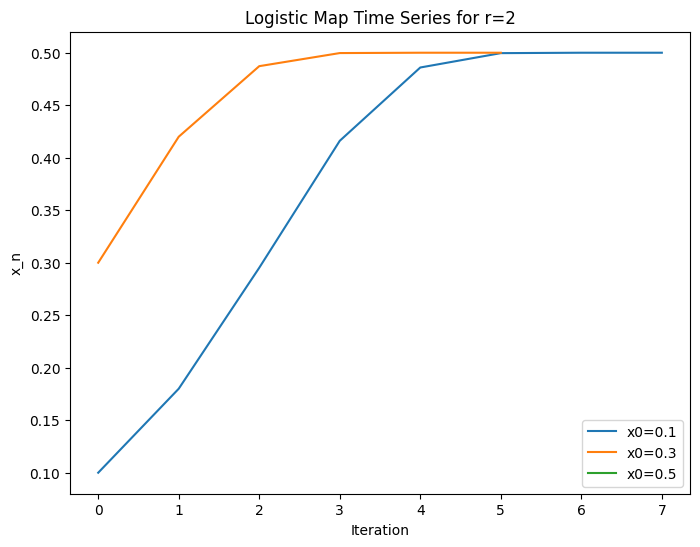

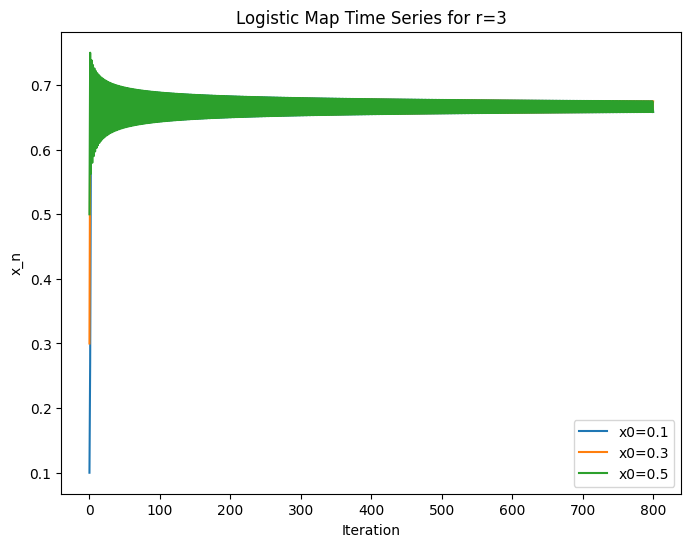

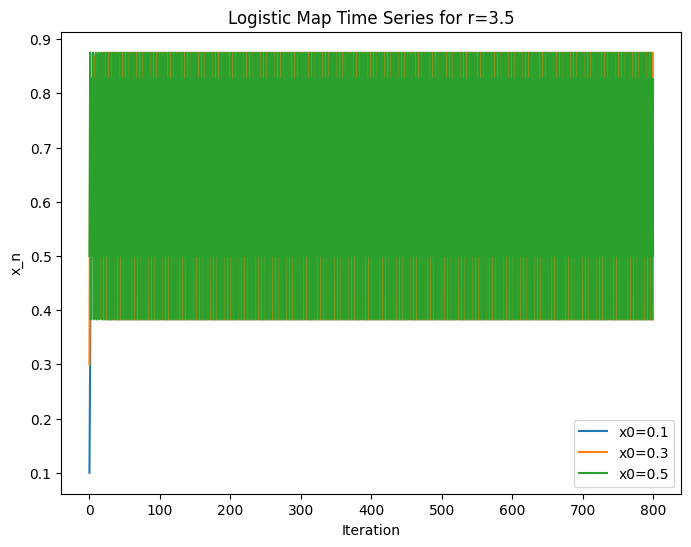

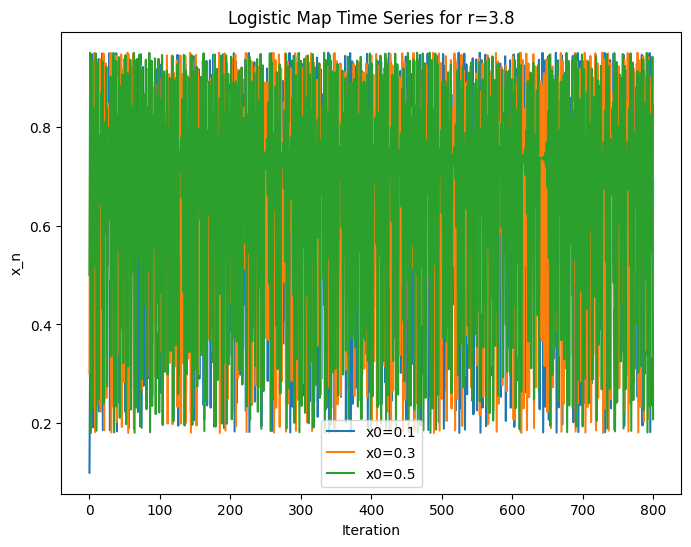

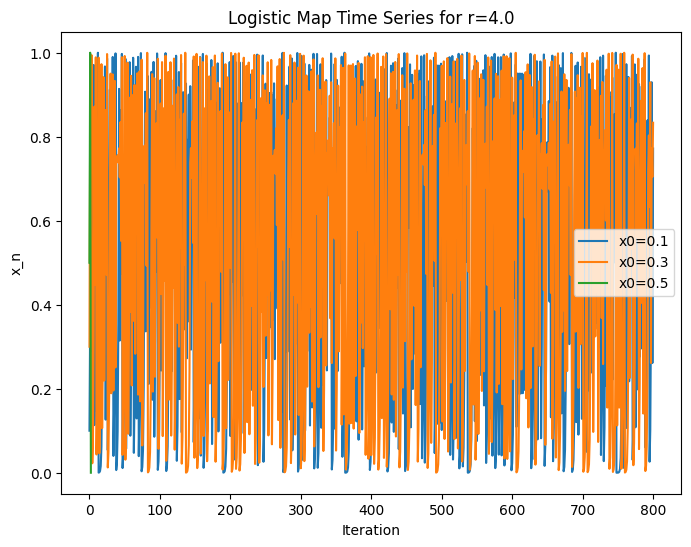

In [ ]:
r_values = [1, 2, 3, 3.5, 3.8, 4.0]
x0_values = [0.1, 0.3, 0.5]

for r in r_values:
    plt.figure(figsize=(8, 6))
    for x0 in x0_values:
        trajectory = logistic_map(r, x0)
        plt.plot(range(len(trajectory)), trajectory, label=f"x0={x0}")
    plt.xlabel("Iteration")
    plt.ylabel("x_n")
    plt.title(f"Logistic Map Time Series for r={r}")
    plt.legend()
    # plt.savefig(f"Logistic Map Time Series for r={r}.png")
    plt.show()

For small r, the value converges even with different initial conditions. For r>3, the value looks periodic and then chaotic as r increases, with very different outcomes for different initial conditions. 

**Part d) Bifurcation Condition**

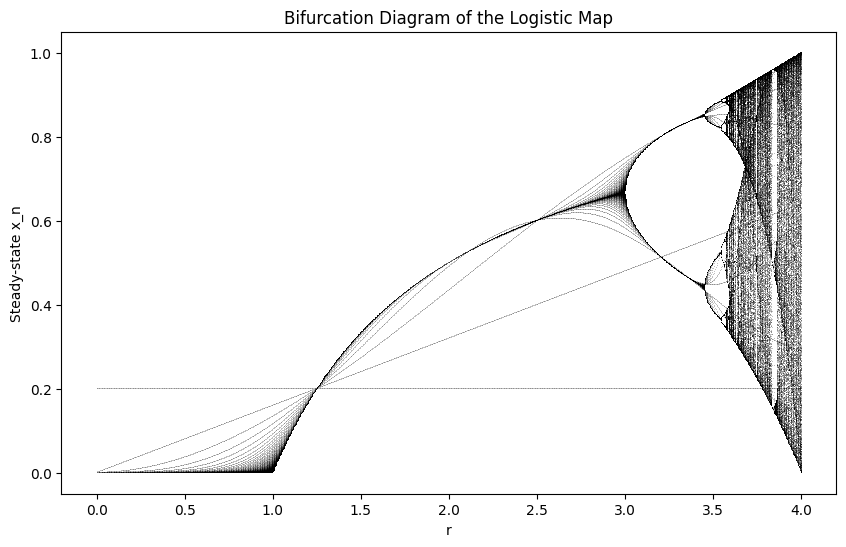

Significant bifurcation at r ≈ 3.0
Significant bifurcation at r ≈ 3.449
Significant bifurcation at r ≈ 3.54
Significant bifurcation at r ≈ 3.564
Significant bifurcation at r ≈ 3.57


In [5]:
r_values = np.linspace(0, 4, 1000)
bifurcation_data = []

for r in r_values:
    steady_states = logistic_map(r)
    bifurcation_data.append((r, steady_states))

plt.figure(figsize=(10, 6))
for r, steady_states in bifurcation_data:
    plt.plot([r] * len(steady_states), steady_states, ',k', alpha=0.25)

plt.xlabel("r")
plt.ylabel("Steady-state x_n")
plt.title("Bifurcation Diagram of the Logistic Map")
# plt.savefig("Bifurcation Diagram of the Logistic Map.png")
plt.show()

# Print significant bifurcation points
critical_r_values = [3.0, 3.449, 3.54, 3.564, 3.57]  # Approximate bifurcation points
for r in critical_r_values:
    print(f"Significant bifurcation at r ≈ {r}")

**Part e) Scaling in Bifurcation**

In [ ]:
def logistic_map(x, r, gamma):
    return r * x * (1 - x**gamma)

def plot_bifurcation():
    # r_values = np.linspace(2.5, 4.0, 1000)  # Range of r values to explore
    r_values = [1, 2, 3, 4]
    gamma_values = np.linspace(0.5, 1.5, 100)  # Values of gamma
    
    # Initialize plot
    plt.figure(figsize=(10, 6))
    
    # Iterate over gamma values
    for gamma in gamma_values:
        # Set up initial condition and parameters
        x = np.random.rand()  # Initial condition
        iterations = 1000  # Number of iterations
        last_iterations = 200  # Points to plot after transients
        
        # For each r, iterate to find the bifurcation
        for r in r_values:
            # Iterate for the system to reach a steady state (ignoring transients)
            for _ in range(iterations - last_iterations):
                x = logistic_map(x, r, gamma)
            
            # Plot the last few values of x (the steady-state behavior)
            for _ in range(last_iterations):
                x = logistic_map(x, r, gamma)
                plt.plot(r, x, ',k', alpha=0.25)  # Plot with transparency for better visualization

    plt.title('Bifurcation Diagram of Modified Logistic Map')
    plt.xlabel('r (Control Parameter)')
    plt.ylabel('x (State of System)')
    plt.grid(True)
    plt.show()

# Run the plot function
plot_bifurcation()

/tmp/ipykernel_60792/3382747567.py:2: RuntimeWarning: invalid value encountered in scalar power
  return r * x * (1 - x**gamma)


KeyboardInterrupt: 